# **Predicting HDB Resale Flat Prices**
DS102 Group Project

Group 1 Team Members:\
1) Ng Jing Wen\
2) Saihah Ismadi\
3) Chua Jin Quan\
4) Andrew Choo\
5) Wong Rhu Yeng


# **Dataset**

Singapore Public Housing Dataset 
(https://www.kaggle.com/lizexi/singapore-public-housing-dataset) 

## Possible Use-Case

Often times, home-owners(and/or would be home-owners) would be curious to know the value of the HDB resale flat they are selling/eye-ing on  before they engage the professionals. While the advertisement flyers distributed by housing agents are a good estimate, they are limited and often not extensive.


## Methodology

The team will build a supervised learning model to predict the pricing of HDB resale flats based on multiple independent variables.

## Project Outline

1.	Data Understanding and Data Preparation\
    1.1.	Import Libraries\
    1.2.	Load Datasets\
    1.3.	Data Cleaning & Feature Engineering


2.	Exploratory Data Analysis\
    2.1.	Visual map of all resale transactions\
    2.2.	Resale Prices vs Distance with MRT\
    2.3.	Resale Prices vs Driving Distance to Downtown\
    2.4.	Resale Prices vs Distance with Good Primary School\
    2.5.	Resale Prices vs Distance with Raffles Girls’ Primary School\
    2.6.	Most popular flat type in the HDB resale market\
    2.7.	Top 5 most popular towns based on number of HDB resale flats sold\
    2.8.	Average Resale Prices in the Top 5 towns\
    2.9.	Resale Price outliers


3.	Data Modelling\
    3.1.	Correlation Heatmap for X Variables\
    3.2.	Variance Inflation Factor (VIF)\
    3.3.	Dropping Extreme VIF\
    3.4.	Linear Model – Training and Predicting


4.	Evaluation of Model\
    4.1.	Plotting the linear model\
    4.2.	Model coefficients and intercept\
    4.3.	Mode testing


5.	Further Improvements


## 1.1 Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import sklearn.metrics as metrics

## 1.2 Load Datasets

##### (1) Resale HDB Transactions from Jan 2015 to Aug 2020 Dataset

In [3]:
#Loading Datasets
resale2015_2016 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
resale2017_onw = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

print(resale2015_2016.shape)
print(resale2017_onw.shape)

#check dataset
resale2015_2016.head()

(37153, 11)
(77895, 11)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [4]:
#combine both datasets
resaleHDB = pd.concat([resale2015_2016,resale2017_onw])
print(resaleHDB.shape)
resaleHDB.town.unique()

(115048, 11)


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

##### 2) Distance to Top Primary Schools Dataset

In [5]:
#load other datasets
distTopSch= pd.read_csv('all_DisToTop50School.csv')
print(distTopSch.shape)

(57386, 52)


In [6]:
distTopSch.head()

,lat,long,a1,a2,a3,a4,a5,a6,a7,a8,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,1.366227,103.850086,2837.909897,1944.304085,8800.810003,1989.260698,11138.754682,11932.187771,14745.946567,1396.420210,...,10178.544004,4108.611063,6217.750835,10166.488043,7081.557471,11218.309794,7538.282595,3712.476618,6711.393871,9024.638915
1,1.370097,103.837688,4130.183147,552.239946,7716.915252,1161.528215,10167.357829,13359.665769,13458.710887,1885.226597,...,9331.647329,5466.061890,5710.857610,9097.747136,8460.866730,9855.892255,8493.944287,5049.171642,7659.739535,7618.039309
2,1.376807,103.842018,3662.045538,923.781475,8500.803963,2047.121245,10986.628027,13281.443295,14089.816464,2472.413360,...,8759.771156,5565.594293,4955.288114,8690.109329,8513.287893,10407.552165,7734.071755,4604.426686,6901.924682,8099.162944
3,1.370998,103.857856,1885.848306,2638.126686,9799.836049,2985.018243,12151.394110,11434.169318,15684.175286,2307.378105,...,10058.182236,3919.463032,5913.231689,10245.244606,6766.496849,12102.387427,6525.915562,2802.906303,5700.423981,9857.127012
4,1.367528,103.857410,2014.799492,2661.911139,9615.218678,2811.618717,11930.650424,11281.910738,15573.417010,1984.578623,...,10379.867075,3641.377686,6265.457695,10518.700413,6539.134871,12036.249016,6798.418132,2884.881826,5979.052389,9825.870177


##### 3) Walking Distance to MRT & Driving Distance to Downtown Dataset

In [7]:
distDriveWalk = pd.read_csv('all_with_Drive_Walk_Dis.csv')
print(distDriveWalk.shape)


(57386, 15)


In [8]:
distDriveWalk.head()

,Index,month,town,flat_type,address,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lat,long,Drive_Dis_Downtown,Walk_Dis_Mrt
0,1,2018-01,ANG MO KIO,2 ROOM,314_ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,59 years 01 month,250000.0,1.366227,103.850086,12317,462
1,2,2018-01,ANG MO KIO,3 ROOM,109_ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,59 years 07 months,240000.0,1.370097,103.837688,13458,1420
2,3,2018-01,ANG MO KIO,3 ROOM,150_ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,62 years,240000.0,1.376807,103.842018,15227,933
3,4,2018-01,ANG MO KIO,3 ROOM,559_ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,61 years,242000.0,1.370998,103.857856,13061,1006
4,5,2018-01,ANG MO KIO,3 ROOM,461_ANG MO KIO AVE 10,10 TO 12,68.0,New Generation,1980,61 years 01 month,255000.0,1.367528,103.857410,13078,850


##### 4) Distance to MRT, Raffles and Good Primary Schools Dataset

In [9]:
geoCode =pd.read_csv('all_geocoded.csv')
print(geoCode.shape)

(57386, 18)


In [10]:
geoCode.head()

,month,town,flat_type,addresses,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,searchval,X,Y,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,2018-01,ANG MO KIO,2 ROOM,314 ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,59 years 01 month,250000.0,TECK GHEE EVERGREEN,29865.99805,38695.97027,1.366227,103.850086,416.686149,9162.186778,1396.420210
1,2018-01,ANG MO KIO,3 ROOM,109 ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,59 years 07 months,240000.0,KEBUN BARU HEIGHTS,28486.23758,39123.83010,1.370097,103.837688,1321.143682,9713.392312,552.239946
2,2018-01,ANG MO KIO,3 ROOM,150 ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,62 years,240000.0,YIO CHU KANG GROVE,28968.13327,39865.81646,1.376807,103.842018,640.152689,10391.930070,879.171242
3,2018-01,ANG MO KIO,3 ROOM,559 ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,61 years,242000.0,CHENG SAN PLACE,30730.76021,39223.53457,1.370998,103.857856,931.080675,9718.096454,1885.848306
4,2018-01,ANG MO KIO,3 ROOM,461 ANG MO KIO AVE 10,10 TO 12,68.0,New Generation,1980,61 years 01 month,255000.0,HDB-ANG MO KIO,30681.04009,38839.80113,1.367528,103.857410,913.873510,9329.200120,1984.578623


In [11]:
geoCode.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

## 1.3 Data Cleaning & Feature Engineering

### 1.3(a) Comparing Datasets -  Which should the team use?

#### The ResaleHDB dataset consists of over 100k of datapoints compared to the other datasets. However, the ResaleHDB dataset are missing features such as the latitude and longitude of the address. The section below shows that we could fill in these missing features by using the data from the distDriveWalk. Only then are we able to get more data points to get better predictions.

In [12]:
#find our how many of 314 AMK Ave 3 in resale original file - does not have lat/long, distance etc
cond1 = resaleHDB['block'] ==  "314"
cond2 = resaleHDB['street_name'] ==  "ANG MO KIO AVE 3"
x=resaleHDB[cond1&cond2]
print(x.shape)

#find out how many of same address in geoCode - have lat/long, distance etc
cond1 = distDriveWalk['address'] ==  "314_ANG MO KIO AVE 3"
y=distDriveWalk[cond1]
print(y.shape)

# We can get more data points if we match both tables by addresses

(25, 11)
(9, 15)


##### Create reference table from distDriveWalk dataset

In [13]:
#subset necessary columns from distDriveWalk and prepare dataset for matching
distDriveWalk_sub = distDriveWalk[['address','lat','long','Drive_Dis_Downtown']]
distDriveWalk_sub

,address,lat,long,Drive_Dis_Downtown
0,314_ANG MO KIO AVE 3,1.366227,103.850086,12317
1,109_ANG MO KIO AVE 4,1.370097,103.837688,13458
2,150_ANG MO KIO AVE 5,1.376807,103.842018,15227
3,559_ANG MO KIO AVE 10,1.370998,103.857856,13061
4,461_ANG MO KIO AVE 10,1.367528,103.857410,13078
...,...,...,...,...
57381,611_YISHUN ST 61,1.420201,103.836153,21926
57382,643_YISHUN ST 61,1.421335,103.837437,21763
57383,724_YISHUN ST 71,1.426475,103.829916,22369
57384,877_YISHUN ST 81,1.413902,103.835454,21027


In [14]:
# Merge distDriveWalk with distTopSch to obtain a1-a50 schools
distDriveWalk_sub_sch = distDriveWalk_sub.merge(distTopSch, on=['lat','long'], how='left')
distDriveWalk_sub_sch.drop_duplicates()
distDriveWalk_sub_sch

,address,lat,long,Drive_Dis_Downtown,a1,a2,a3,a4,a5,a6,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,314_ANG MO KIO AVE 3,1.366227,103.850086,12317,2837.909897,1944.304085,8800.810003,1989.260698,11138.754682,11932.187771,...,10178.544004,4108.611063,6217.750835,10166.488043,7081.557471,11218.309794,7538.282595,3712.476618,6711.393871,9024.638915
1,314_ANG MO KIO AVE 3,1.366227,103.850086,12317,2837.909897,1944.304085,8800.810003,1989.260698,11138.754682,11932.187771,...,10178.544004,4108.611063,6217.750835,10166.488043,7081.557471,11218.309794,7538.282595,3712.476618,6711.393871,9024.638915
2,314_ANG MO KIO AVE 3,1.366227,103.850086,12317,2837.909897,1944.304085,8800.810003,1989.260698,11138.754682,11932.187771,...,10178.544004,4108.611063,6217.750835,10166.488043,7081.557471,11218.309794,7538.282595,3712.476618,6711.393871,9024.638915
3,314_ANG MO KIO AVE 3,1.366227,103.850086,12317,2837.909897,1944.304085,8800.810003,1989.260698,11138.754682,11932.187771,...,10178.544004,4108.611063,6217.750835,10166.488043,7081.557471,11218.309794,7538.282595,3712.476618,6711.393871,9024.638915
4,314_ANG MO KIO AVE 3,1.366227,103.850086,12317,2837.909897,1944.304085,8800.810003,1989.260698,11138.754682,11932.187771,...,10178.544004,4108.611063,6217.750835,10166.488043,7081.557471,11218.309794,7538.282595,3712.476618,6711.393871,9024.638915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592005,666_YISHUN AVE 4,1.418998,103.840568,21791,6382.647532,5087.212098,11510.580950,6539.084120,14123.292637,16247.873199,...,4498.239216,9516.372942,257.872536,5216.918762,12134.000568,11823.453730,7372.025783,7099.127443,6754.238674,9410.455901
592006,666_YISHUN AVE 4,1.418998,103.840568,21791,6382.647532,5087.212098,11510.580950,6539.084120,14123.292637,16247.873199,...,4498.239216,9516.372942,257.872536,5216.918762,12134.000568,11823.453730,7372.025783,7099.127443,6754.238674,9410.455901
592007,666_YISHUN AVE 4,1.418998,103.840568,21791,6382.647532,5087.212098,11510.580950,6539.084120,14123.292637,16247.873199,...,4498.239216,9516.372942,257.872536,5216.918762,12134.000568,11823.453730,7372.025783,7099.127443,6754.238674,9410.455901
592008,666_YISHUN AVE 4,1.418998,103.840568,21791,6382.647532,5087.212098,11510.580950,6539.084120,14123.292637,16247.873199,...,4498.239216,9516.372942,257.872536,5216.918762,12134.000568,11823.453730,7372.025783,7099.127443,6754.238674,9410.455901


In [16]:
#Each address should have one pair of 1 lat + 1 long 
distDriveWalk_sub_sch_max = distDriveWalk_sub_sch.groupby(['address']).max().reset_index()
distDriveWalk_sub_sch_max.drop_duplicates()
distDriveWalk_sub_sch_max

,address,lat,long,Drive_Dis_Downtown,a1,a2,a3,a4,a5,a6,...,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50
0,100_BEDOK NTH AVE 4,1.334356,103.940892,17188,8984.889009,12964.880433,18372.963132,12582.333784,19989.870024,1995.196820,...,19618.527322,7197.568458,15328.770549,20300.155993,4410.685742,21736.673983,9602.566087,8137.238896,9583.661489,19791.062182
1,100_C'WEALTH CRES,1.307705,103.801272,7673,10929.772101,8218.083361,4383.441851,6883.102492,4637.938815,16111.430995,...,16042.233013,9371.709789,13388.757535,15025.827654,11369.397088,8580.818230,15885.911970,11537.026756,15081.940841,8139.160360
2,100_LOR 1 TOA PAYOH,1.339564,103.848586,11470,4714.431907,4121.837157,8058.408666,2921.358077,9947.830602,11077.549643,...,12931.925671,3297.141029,9140.493790,12683.052699,5994.957217,11397.133813,9672.684803,5222.344741,8899.461889,9595.256482
3,100_WHAMPOA DR,1.320779,103.854349,6826,6229.780991,6302.192309,8908.425116,5038.785047,10344.342189,10171.667384,...,15118.995089,3558.395930,11291.573920,14851.577148,5294.739285,12669.947160,10993.459976,6478.194879,10285.770470,11133.524402
4,101A_PUNGGOL FIELD,1.397946,103.905945,18397,4456.437504,8415.622492,15904.243633,9106.071706,18285.382847,9966.669932,...,11628.416062,6938.099085,7702.657761,12786.891938,7751.222107,17823.173790,824.679652,3901.419986,906.412459,15447.022262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,9_MARSILING DR,1.441292,103.776450,24244,13321.741158,9900.722712,11490.933034,10960.149248,13623.582979,23323.556459,...,4530.623549,15801.198805,7498.145636,2638.037481,18729.042026,9052.253564,14896.625224,14184.926369,14304.858544,7591.222121
8695,9_PINE CL,1.309469,103.882437,5880,7115.200306,8936.440251,12245.147730,7921.346749,13519.189438,7099.570068,...,17411.538671,3673.662867,13284.036778,17430.697712,2979.971821,16039.754272,10972.868053,6896.036363,10438.253332,14465.309202
8696,9_SELEGIE RD,1.303461,103.850709,3204,10300.040664,9629.395571,9144.158016,8196.599819,10104.609653,12301.565715,...,18407.199547,7467.378780,14909.418211,17832.585824,8268.594559,13211.593049,15044.375315,10540.116197,14349.402370,12357.053628
8697,9_ST. GEORGE'S RD,1.323724,103.862995,8921,5628.653645,6417.092988,9791.388593,5297.462351,11314.337960,9227.950762,...,15110.573243,2654.691888,11140.049942,14977.401199,4295.424731,13448.430987,10236.627614,5758.526719,9560.511235,11804.871324


In [17]:
#split address into blk and street name to match to main resaleHDB dataset
distDriveWalk_sub_sch_max['block'] = (np.where(distDriveWalk_sub_sch_max['address'].str.contains('_'),
                  distDriveWalk_sub_sch_max['address'].str.split('_').str[0],
                  distDriveWalk_sub_sch_max['address']))

distDriveWalk_sub_sch_max['street_name'] = (np.where(distDriveWalk_sub_sch_max['address'].str.contains('_'),
                  distDriveWalk_sub_sch_max['address'].str.split('_').str[1],
                  distDriveWalk_sub_sch_max['address']))

distDriveWalk_sub_sch_max.head()

,address,lat,long,Drive_Dis_Downtown,a1,a2,a3,a4,a5,a6,...,a43,a44,a45,a46,a47,a48,a49,a50,block,street_name
0,100_BEDOK NTH AVE 4,1.334356,103.940892,17188,8984.889009,12964.880433,18372.963132,12582.333784,19989.870024,1995.196820,...,15328.770549,20300.155993,4410.685742,21736.673983,9602.566087,8137.238896,9583.661489,19791.062182,100,BEDOK NTH AVE 4
1,100_C'WEALTH CRES,1.307705,103.801272,7673,10929.772101,8218.083361,4383.441851,6883.102492,4637.938815,16111.430995,...,13388.757535,15025.827654,11369.397088,8580.818230,15885.911970,11537.026756,15081.940841,8139.160360,100,C'WEALTH CRES
2,100_LOR 1 TOA PAYOH,1.339564,103.848586,11470,4714.431907,4121.837157,8058.408666,2921.358077,9947.830602,11077.549643,...,9140.493790,12683.052699,5994.957217,11397.133813,9672.684803,5222.344741,8899.461889,9595.256482,100,LOR 1 TOA PAYOH
3,100_WHAMPOA DR,1.320779,103.854349,6826,6229.780991,6302.192309,8908.425116,5038.785047,10344.342189,10171.667384,...,11291.573920,14851.577148,5294.739285,12669.947160,10993.459976,6478.194879,10285.770470,11133.524402,100,WHAMPOA DR
4,101A_PUNGGOL FIELD,1.397946,103.905945,18397,4456.437504,8415.622492,15904.243633,9106.071706,18285.382847,9966.669932,...,7702.657761,12786.891938,7751.222107,17823.173790,824.679652,3901.419986,906.412459,15447.022262,101A,PUNGGOL FIELD


In [18]:
#preview data of reference table
distDriveWalk_sub_sch_max = distDriveWalk_sub_sch_max.drop_duplicates()
distDriveWalk_sub_sch_max

,address,lat,long,Drive_Dis_Downtown,a1,a2,a3,a4,a5,a6,...,a43,a44,a45,a46,a47,a48,a49,a50,block,street_name
0,100_BEDOK NTH AVE 4,1.334356,103.940892,17188,8984.889009,12964.880433,18372.963132,12582.333784,19989.870024,1995.196820,...,15328.770549,20300.155993,4410.685742,21736.673983,9602.566087,8137.238896,9583.661489,19791.062182,100,BEDOK NTH AVE 4
1,100_C'WEALTH CRES,1.307705,103.801272,7673,10929.772101,8218.083361,4383.441851,6883.102492,4637.938815,16111.430995,...,13388.757535,15025.827654,11369.397088,8580.818230,15885.911970,11537.026756,15081.940841,8139.160360,100,C'WEALTH CRES
2,100_LOR 1 TOA PAYOH,1.339564,103.848586,11470,4714.431907,4121.837157,8058.408666,2921.358077,9947.830602,11077.549643,...,9140.493790,12683.052699,5994.957217,11397.133813,9672.684803,5222.344741,8899.461889,9595.256482,100,LOR 1 TOA PAYOH
3,100_WHAMPOA DR,1.320779,103.854349,6826,6229.780991,6302.192309,8908.425116,5038.785047,10344.342189,10171.667384,...,11291.573920,14851.577148,5294.739285,12669.947160,10993.459976,6478.194879,10285.770470,11133.524402,100,WHAMPOA DR
4,101A_PUNGGOL FIELD,1.397946,103.905945,18397,4456.437504,8415.622492,15904.243633,9106.071706,18285.382847,9966.669932,...,7702.657761,12786.891938,7751.222107,17823.173790,824.679652,3901.419986,906.412459,15447.022262,101A,PUNGGOL FIELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,9_MARSILING DR,1.441292,103.776450,24244,13321.741158,9900.722712,11490.933034,10960.149248,13623.582979,23323.556459,...,7498.145636,2638.037481,18729.042026,9052.253564,14896.625224,14184.926369,14304.858544,7591.222121,9,MARSILING DR
8695,9_PINE CL,1.309469,103.882437,5880,7115.200306,8936.440251,12245.147730,7921.346749,13519.189438,7099.570068,...,13284.036778,17430.697712,2979.971821,16039.754272,10972.868053,6896.036363,10438.253332,14465.309202,9,PINE CL
8696,9_SELEGIE RD,1.303461,103.850709,3204,10300.040664,9629.395571,9144.158016,8196.599819,10104.609653,12301.565715,...,14909.418211,17832.585824,8268.594559,13211.593049,15044.375315,10540.116197,14349.402370,12357.053628,9,SELEGIE RD
8697,9_ST. GEORGE'S RD,1.323724,103.862995,8921,5628.653645,6417.092988,9791.388593,5297.462351,11314.337960,9227.950762,...,11140.049942,14977.401199,4295.424731,13448.430987,10236.627614,5758.526719,9560.511235,11804.871324,9,ST. GEORGE'S RD


In [19]:
#to join with geoCode, _ and . in addresses column and rename to "address"
distDriveWalk_sub_sch_max.address.replace("_"," ", inplace=True, regex=True)
distDriveWalk_sub_sch_max.address.replace("\.","", inplace=True, regex=True)

distDriveWalk_sub_sch_max.rename(columns={'address':'addresses'}, inplace=True)

distDriveWalk_sub_sch_max

,addresses,lat,long,Drive_Dis_Downtown,a1,a2,a3,a4,a5,a6,...,a43,a44,a45,a46,a47,a48,a49,a50,block,street_name
0,100 BEDOK NTH AVE 4,1.334356,103.940892,17188,8984.889009,12964.880433,18372.963132,12582.333784,19989.870024,1995.196820,...,15328.770549,20300.155993,4410.685742,21736.673983,9602.566087,8137.238896,9583.661489,19791.062182,100,BEDOK NTH AVE 4
1,100 C'WEALTH CRES,1.307705,103.801272,7673,10929.772101,8218.083361,4383.441851,6883.102492,4637.938815,16111.430995,...,13388.757535,15025.827654,11369.397088,8580.818230,15885.911970,11537.026756,15081.940841,8139.160360,100,C'WEALTH CRES
2,100 LOR 1 TOA PAYOH,1.339564,103.848586,11470,4714.431907,4121.837157,8058.408666,2921.358077,9947.830602,11077.549643,...,9140.493790,12683.052699,5994.957217,11397.133813,9672.684803,5222.344741,8899.461889,9595.256482,100,LOR 1 TOA PAYOH
3,100 WHAMPOA DR,1.320779,103.854349,6826,6229.780991,6302.192309,8908.425116,5038.785047,10344.342189,10171.667384,...,11291.573920,14851.577148,5294.739285,12669.947160,10993.459976,6478.194879,10285.770470,11133.524402,100,WHAMPOA DR
4,101A PUNGGOL FIELD,1.397946,103.905945,18397,4456.437504,8415.622492,15904.243633,9106.071706,18285.382847,9966.669932,...,7702.657761,12786.891938,7751.222107,17823.173790,824.679652,3901.419986,906.412459,15447.022262,101A,PUNGGOL FIELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,9 MARSILING DR,1.441292,103.776450,24244,13321.741158,9900.722712,11490.933034,10960.149248,13623.582979,23323.556459,...,7498.145636,2638.037481,18729.042026,9052.253564,14896.625224,14184.926369,14304.858544,7591.222121,9,MARSILING DR
8695,9 PINE CL,1.309469,103.882437,5880,7115.200306,8936.440251,12245.147730,7921.346749,13519.189438,7099.570068,...,13284.036778,17430.697712,2979.971821,16039.754272,10972.868053,6896.036363,10438.253332,14465.309202,9,PINE CL
8696,9 SELEGIE RD,1.303461,103.850709,3204,10300.040664,9629.395571,9144.158016,8196.599819,10104.609653,12301.565715,...,14909.418211,17832.585824,8268.594559,13211.593049,15044.375315,10540.116197,14349.402370,12357.053628,9,SELEGIE RD
8697,9 ST GEORGE'S RD,1.323724,103.862995,8921,5628.653645,6417.092988,9791.388593,5297.462351,11314.337960,9227.950762,...,11140.049942,14977.401199,4295.424731,13448.430987,10236.627614,5758.526719,9560.511235,11804.871324,9,ST. GEORGE'S RD


In [20]:
# Prepare to Merge with geoCode to obtain other distanceWithMRT, distanceWithRaffles, distanceWithGdPri
# select certain columns from geoCode
geoCode_sub = geoCode[['addresses','searchval','distanceWithMrt','distanceWithRaffles','distanceWithGdPri']]
geoCode_sub.drop_duplicates()
#Since difference is not too much, we take the max record
geoCode_sub_max = geoCode_sub.groupby(['addresses']).max().reset_index()

geoCode_sub_max

,addresses,searchval,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,1 BEACH RD,BEACH ROAD GARDENS,444.626891,2631.744938,2611.728325
1,1 BEDOK STH AVE 1,HDB-BEDOK,542.371463,10034.758300,1377.556403
2,1 CHAI CHEE RD,PING YI GARDENS,920.064957,9322.620540,1229.586999
3,1 CHANGI VILLAGE RD,HDB-CHANGI VILLAGE ROV,4621.139339,19127.148390,3307.152873
4,1 DELTA AVE,HDB-BUKIT MERAH,676.855358,2702.729888,860.066142
...,...,...,...,...,...
8694,99A LOR 2 TOA PAYOH,TOA PAYOH PALM SPRING,187.604795,6127.434660,863.304487
8695,99B LOR 2 TOA PAYOH,TOA PAYOH PALM SPRING,198.449632,6119.575030,887.541441
8696,99C LOR 2 TOA PAYOH,TOA PAYOH PALM SPRING,177.186680,6148.044456,913.459527
8697,9A BOON TIONG RD,TIONG BAHRU VIEW,157.393807,2558.199755,1158.197773


In [21]:
# Merge with geoCode_sub_max
distDriveWalk_sub_sch_max_geo = distDriveWalk_sub_sch_max.merge(geoCode_sub_max, on=['addresses'], how='left')
distDriveWalk_sub_sch_max_geo.drop_duplicates()
distDriveWalk_sub_sch_max_geo

,addresses,lat,long,Drive_Dis_Downtown,a1,a2,a3,a4,a5,a6,...,a47,a48,a49,a50,block,street_name,searchval,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,100 BEDOK NTH AVE 4,1.334356,103.940892,17188,8984.889009,12964.880433,18372.963132,12582.333784,19989.870024,1995.196820,...,9602.566087,8137.238896,9583.661489,19791.062182,100,BEDOK NTH AVE 4,PEARL GARDEN,797.004767,11246.516720,527.172334
1,100 C'WEALTH CRES,1.307705,103.801272,7673,10929.772101,8218.083361,4383.441851,6883.102492,4637.938815,16111.430995,...,15885.911970,11537.026756,15081.940841,8139.160360,100,C'WEALTH CRES,CRESCENT VIEW,671.019456,6180.895428,1600.888437
2,100 LOR 1 TOA PAYOH,1.339564,103.848586,11470,4714.431907,4121.837157,8058.408666,2921.358077,9947.830602,11077.549643,...,9672.684803,5222.344741,8899.461889,9595.256482,100,LOR 1 TOA PAYOH,TOA PAYOH PALM SPRING,222.895195,6201.059287,807.291662
3,100 WHAMPOA DR,1.320779,103.854349,6826,6229.780991,6302.192309,8908.425116,5038.785047,10344.342189,10171.667384,...,10993.459976,6478.194879,10285.770470,11133.524402,100,WHAMPOA DR,WHAMPOA VIEW,819.516725,4114.255315,1024.789374
4,101A PUNGGOL FIELD,1.397946,103.905945,18397,4456.437504,8415.622492,15904.243633,9106.071706,18285.382847,9966.669932,...,824.679652,3901.419986,906.412459,15447.022262,101A,PUNGGOL FIELD,HDB-PUNGGOL,851.809873,14065.787210,824.679652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,9 MARSILING DR,1.441292,103.776450,24244,13321.741158,9900.722712,11490.933034,10960.149248,13623.582979,23323.556459,...,14896.625224,14184.926369,14304.858544,7591.222121,9,MARSILING DR,MARSILING GARDENS,1011.459443,19404.565923,2638.037481
8695,9 PINE CL,1.309469,103.882437,5880,7115.200306,8936.440251,12245.147730,7921.346749,13519.189438,7099.570068,...,10972.868053,6896.036363,10438.253332,14465.309202,9,PINE CL,HDB-GUILLEMARD,363.886398,4468.098127,667.940320
8696,9 SELEGIE RD,1.303461,103.850709,3204,10300.040664,9629.395571,9144.158016,8196.599819,10104.609653,12301.565715,...,15044.375315,10540.116197,14349.402370,12357.053628,9,SELEGIE RD,SELEGIE HOUSE,233.369589,2175.431343,1296.340161
8697,9 ST GEORGE'S RD,1.323724,103.862995,8921,5628.653645,6417.092988,9791.388593,5297.462351,11314.337960,9227.950762,...,10236.627614,5758.526719,9560.511235,11804.871324,9,ST. GEORGE'S RD,SAINT GEORGE'S EAST GARDENS,513.598766,4611.646971,1726.553840


#### We will join with the main dataset, i.e. resaleHDB in order to obtain more features from the distDriveWalk dataset

In [22]:
# Merge resaleHDB data to reference table to get lat long etc
resaleHDB_match = resaleHDB.merge(distDriveWalk_sub_sch_max_geo, on=['block','street_name'], how='left')
resaleHDB_match

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,a45,a46,a47,a48,a49,a50,searchval,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,...,8784.290980,9898.189585,8258.628706,5071.287917,7426.678067,7603.254076,KEBUN BARU LINK 1,1102.047333,10264.638450,398.600330
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,...,7172.204039,11877.971851,7443.233167,3332.076402,6631.829604,9604.675816,CHENG SAN GREEN,807.806650,10028.228240,1998.100164
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,...,8632.963684,9941.127524,8274.266228,4998.296430,7441.098511,7663.151111,HDB-ANG MO KIO,1184.271617,10084.915520,430.887585
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,...,7487.776543,11808.648665,8031.841136,4264.502365,7201.663012,9596.227972,CHONG BOON CENTRE,689.159860,9341.713414,1852.231622
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,...,6825.061876,12093.312885,7169.135993,3180.708844,6351.381929,9842.036151,CHENG SAN PLACE,929.415476,9786.809697,1892.571045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115043,2020-08,YISHUN,EXECUTIVE,611,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,66 years 03 months,...,12523.281728,11475.694787,7880.462005,7531.237030,7263.372009,9076.385599,NEE SOON CENTRAL MEADOWS,472.288614,15264.628720,530.766169
115044,2020-08,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,142.0,Apartment,1987,66 years 01 month,...,12544.943431,11664.156297,7768.780389,7525.696599,7163.685310,9265.881593,HDB-YISHUN,662.983861,15374.950724,373.478202
115045,2020-08,YISHUN,EXECUTIVE,724,YISHUN ST 71,07 TO 09,142.0,Apartment,1986,64 years 11 months,...,13495.546619,11308.486658,8722.290185,8515.763482,8140.039340,8960.529176,KHATIB SPRING,655.684638,16047.820672,1340.339325
115046,2020-08,YISHUN,EXECUTIVE,877,YISHUN ST 81,04 TO 06,145.0,Maisonette,1987,66 years 04 months,...,12005.777700,11045.908292,7840.745178,7100.227572,7174.038675,8627.095739,HDB-YISHUN,475.368735,14577.359220,1015.846944


In [23]:
#Take only complete records(i.e. no NA) - drop records where there are no lat, long, etc features
print(resaleHDB_match.isnull().sum(axis = 0))
complete_records = resaleHDB_match.dropna(axis=0, subset=['searchval']).reset_index()
complete_records

month                    0
town                     0
flat_type                0
block                    0
street_name              0
                      ... 
a50                    975
searchval              735
distanceWithMrt        735
distanceWithRaffles    735
distanceWithGdPri      735
Length: 69, dtype: int64


,index,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,a45,a46,a47,a48,a49,a50,searchval,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,8784.290980,9898.189585,8258.628706,5071.287917,7426.678067,7603.254076,KEBUN BARU LINK 1,1102.047333,10264.638450,398.600330
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,7172.204039,11877.971851,7443.233167,3332.076402,6631.829604,9604.675816,CHENG SAN GREEN,807.806650,10028.228240,1998.100164
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,8632.963684,9941.127524,8274.266228,4998.296430,7441.098511,7663.151111,HDB-ANG MO KIO,1184.271617,10084.915520,430.887585
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,7487.776543,11808.648665,8031.841136,4264.502365,7201.663012,9596.227972,CHONG BOON CENTRE,689.159860,9341.713414,1852.231622
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,6825.061876,12093.312885,7169.135993,3180.708844,6351.381929,9842.036151,CHENG SAN PLACE,929.415476,9786.809697,1892.571045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114308,115043,2020-08,YISHUN,EXECUTIVE,611,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,...,12523.281728,11475.694787,7880.462005,7531.237030,7263.372009,9076.385599,NEE SOON CENTRAL MEADOWS,472.288614,15264.628720,530.766169
114309,115044,2020-08,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,142.0,Apartment,1987,...,12544.943431,11664.156297,7768.780389,7525.696599,7163.685310,9265.881593,HDB-YISHUN,662.983861,15374.950724,373.478202
114310,115045,2020-08,YISHUN,EXECUTIVE,724,YISHUN ST 71,07 TO 09,142.0,Apartment,1986,...,13495.546619,11308.486658,8722.290185,8515.763482,8140.039340,8960.529176,KHATIB SPRING,655.684638,16047.820672,1340.339325
114311,115046,2020-08,YISHUN,EXECUTIVE,877,YISHUN ST 81,04 TO 06,145.0,Maisonette,1987,...,12005.777700,11045.908292,7840.745178,7100.227572,7174.038675,8627.095739,HDB-YISHUN,475.368735,14577.359220,1015.846944


#### We now have 114k complete and clean records to work with. This is more than the initial 57k records of data with distance-to-landmarks attributes.

### 1.3(b) Feature Engineering - Creating columns useful for EDA and/or Modelling

##### Adding Period of Transactions

In [24]:
#Create Year and month of transaction column
complete_records['Year_Transaction'] = (np.where(complete_records['month'].str.contains('-'),
                  complete_records['month'].str.split('-').str[0],
                  complete_records['month']))

complete_records['Month_Transaction'] = (np.where(complete_records['month'].str.contains('-'),
                  complete_records['month'].str.split('-').str[1],
                  complete_records['month']))

# Add quarters of Transaction
def quarters(x):
    if x <=3:
        return "Q1"
    if x <=6:
        return "Q2"
    if x <=9:
        return "Q3"
    else:
        return "Q4"

complete_records["Month_Transaction"] = pd.to_numeric(complete_records["Month_Transaction"])
complete_records['Qtr_Transaction'] = complete_records['Month_Transaction'].apply(quarters)
complete_records

,index,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,a48,a49,a50,searchval,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,Year_Transaction,Month_Transaction,Qtr_Transaction
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,5071.287917,7426.678067,7603.254076,KEBUN BARU LINK 1,1102.047333,10264.638450,398.600330,2015,1,Q1
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,3332.076402,6631.829604,9604.675816,CHENG SAN GREEN,807.806650,10028.228240,1998.100164,2015,1,Q1
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,4998.296430,7441.098511,7663.151111,HDB-ANG MO KIO,1184.271617,10084.915520,430.887585,2015,1,Q1
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,4264.502365,7201.663012,9596.227972,CHONG BOON CENTRE,689.159860,9341.713414,1852.231622,2015,1,Q1
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,3180.708844,6351.381929,9842.036151,CHENG SAN PLACE,929.415476,9786.809697,1892.571045,2015,1,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114308,115043,2020-08,YISHUN,EXECUTIVE,611,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,...,7531.237030,7263.372009,9076.385599,NEE SOON CENTRAL MEADOWS,472.288614,15264.628720,530.766169,2020,8,Q3
114309,115044,2020-08,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,142.0,Apartment,1987,...,7525.696599,7163.685310,9265.881593,HDB-YISHUN,662.983861,15374.950724,373.478202,2020,8,Q3
114310,115045,2020-08,YISHUN,EXECUTIVE,724,YISHUN ST 71,07 TO 09,142.0,Apartment,1986,...,8515.763482,8140.039340,8960.529176,KHATIB SPRING,655.684638,16047.820672,1340.339325,2020,8,Q3
114311,115046,2020-08,YISHUN,EXECUTIVE,877,YISHUN ST 81,04 TO 06,145.0,Maisonette,1987,...,7100.227572,7174.038675,8627.095739,HDB-YISHUN,475.368735,14577.359220,1015.846944,2020,8,Q3


##### Clean Remaining Lease column, converting into months and categorise

In [25]:
#Create Lease to split to years and months of remaining lease column
complete_records.remaining_lease.replace("months","month", inplace=True, regex=True)
complete_records.remaining_lease.replace(" years ","-", inplace=True, regex=True)
complete_records.remaining_lease.replace(" years","", inplace=True, regex=True)
complete_records.remaining_lease.replace(" month","", inplace=True, regex=True)

complete_records['Lease_Year_Remain'] = (np.where(complete_records['remaining_lease'].str.contains('-'),
                  complete_records['remaining_lease'].str.split('-').str[0],
                  complete_records['remaining_lease']))

complete_records['Lease_Month_Remain'] = (np.where(complete_records['remaining_lease'].str.contains('-'),
                  complete_records['remaining_lease'].str.split('-').str[1],
                  complete_records['remaining_lease']))

#fill NAs on both fields
complete_records['Lease_Year_Remain'] = complete_records['Lease_Year_Remain'] .fillna(complete_records['remaining_lease'] )
complete_records['Lease_Month_Remain'] = complete_records['Lease_Month_Remain'] .fillna(0)

#convert lease year and month to numeric to calculate total months 
complete_records["Lease_Year_Remain"] = pd.to_numeric(complete_records["Lease_Year_Remain"])
complete_records["Lease_Month_Remain"] = pd.to_numeric(complete_records["Lease_Month_Remain"])

#Calculate total lease months
Lease_Remaining_inMonths = (complete_records["Lease_Year_Remain"]*12)+complete_records["Lease_Month_Remain"]
complete_records["Lease_Remaining_inMonths"] = Lease_Remaining_inMonths

# Add categories of remaining lease
def remain_lease_cat(x):
    if x <=5:
        return "5"
    if x <=10:
        return "6-10"
    if x <=20:
        return "11-20"
    if x <=30:
        return "21-30"
    if x <=40:
        return "31-40"
    if x <=50:
        return "41-50"
    if x <=60:
        return "51-60"
    if x <=70:
        return "61-70"
    if x <=80:
        return "71-80"
    if x <=90:
        return "81-90"
    if x <=95:
        return "91-95"
    else:
        return ">=96"

complete_records['Lease_Remaining_Category'] = complete_records["Lease_Year_Remain"].apply(remain_lease_cat)

In [26]:
complete_records.head()

,index,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,Year_Transaction,Month_Transaction,Qtr_Transaction,Lease_Year_Remain,Lease_Month_Remain,Lease_Remaining_inMonths,Lease_Remaining_Category
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,1102.047333,10264.638450,398.600330,2015,1,Q1,70,0,840,61-70
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,807.806650,10028.228240,1998.100164,2015,1,Q1,65,0,780,61-70
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,1184.271617,10084.915520,430.887585,2015,1,Q1,64,0,768,61-70
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,689.159860,9341.713414,1852.231622,2015,1,Q1,63,0,756,61-70
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,929.415476,9786.809697,1892.571045,2015,1,Q1,64,0,768,61-70


##### Categorise Floor Area SQM

In [25]:
# Add categories of remaining lease
def floor_area__cat(x):
    if x <=50:
        return "30-50"
    if x <=60:
        return "51-60"
    if x <=70:
        return "61-70"
    if x <=80:
        return "71-80"
    if x <=90:
        return "81-90"
    if x <=100:
        return "91-100"
    if x <=120:
        return "101-120"
    if x <=150:
        return "121-150"
    if x <=200:
        return "151-200"
    else:
        return ">200"
    
complete_records['Floor_Area_Category'] = complete_records["floor_area_sqm"].apply(floor_area__cat)

In [26]:
complete_records.shape

(114313, 74)

##### Save data

In [27]:
# complete_records.to_csv('complete_records.csv')

In [28]:
list(complete_records.columns)

['index',
 'month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'remaining_lease',
 'resale_price',
 'addresses',
 'lat',
 'long',
 'Drive_Dis_Downtown',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a7',
 'a8',
 'a9',
 'a10',
 'a11',
 'a12',
 'a13',
 'a14',
 'a15',
 'a16',
 'a17',
 'a18',
 'a19',
 'a20',
 'a21',
 'a22',
 'a23',
 'a24',
 'a25',
 'a26',
 'a27',
 'a28',
 'a29',
 'a30',
 'a31',
 'a32',
 'a33',
 'a34',
 'a35',
 'a36',
 'a37',
 'a38',
 'a39',
 'a40',
 'a41',
 'a42',
 'a43',
 'a44',
 'a45',
 'a46',
 'a47',
 'a48',
 'a49',
 'a50',
 'searchval',
 'distanceWithMrt',
 'distanceWithRaffles',
 'distanceWithGdPri',
 'Year_Transaction',
 'Month_Transaction',
 'Qtr_Transaction',
 'Floor_Area_Category']

## 2) Exploratory Data Analysis

##### a) The Visual map of all the 114k HDB Resale transactions in our dataset shows that the higher resale prices are at the South, Central and East of Singapore

In [29]:
#load saved data here
complete_records = pd.read_csv('complete_records.csv')

C:\Users\Louise\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


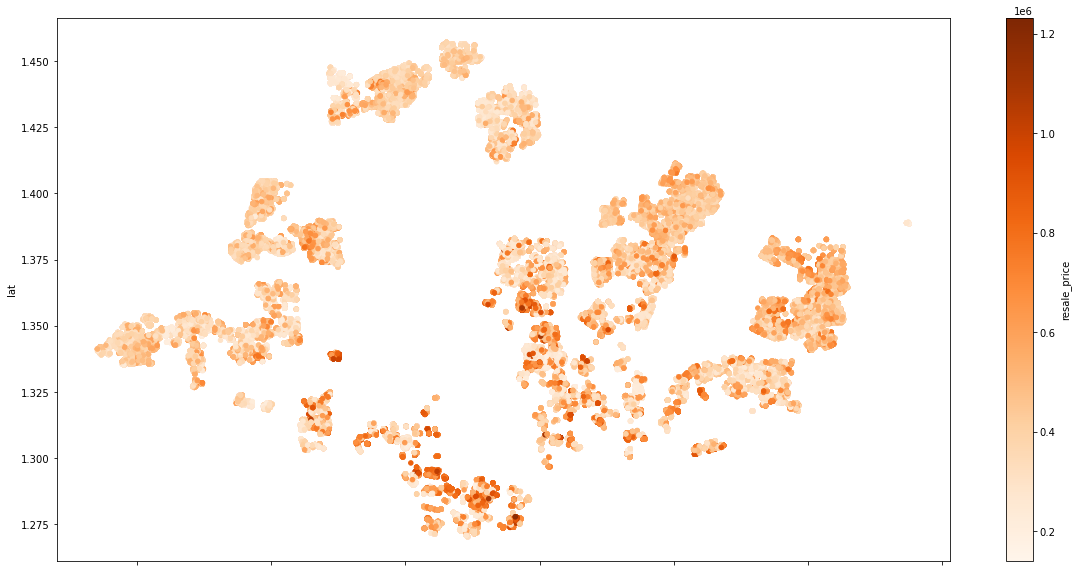

In [30]:
complete_records.plot(kind="scatter", 
        x="long", 
        y="lat", 
        c="resale_price",
        figsize = (20,10),
        colormap="Oranges")

##### b) There are still affordable prices for middle to older flats near MRTs and good primary schools.

i) From the scatterplots A and B, it suggests the higher the accessibility to public transportation and downtown becomes, the higher the resale price gets. However, this cannot be said the same for scatterplot C as it suggests that resale prices are not necessarily higher for HDBs closer to good primary schools. This is probably due to our declining birth rate and/or that the distance to good primary schools is not an important factor to all home-buyers.

ii) Scatterplots B and D seem very similar. Since Raffles Girls' Primary is close to downtown, this similarity is expected. We would run a correlation test later to decide if we should drop either columns.

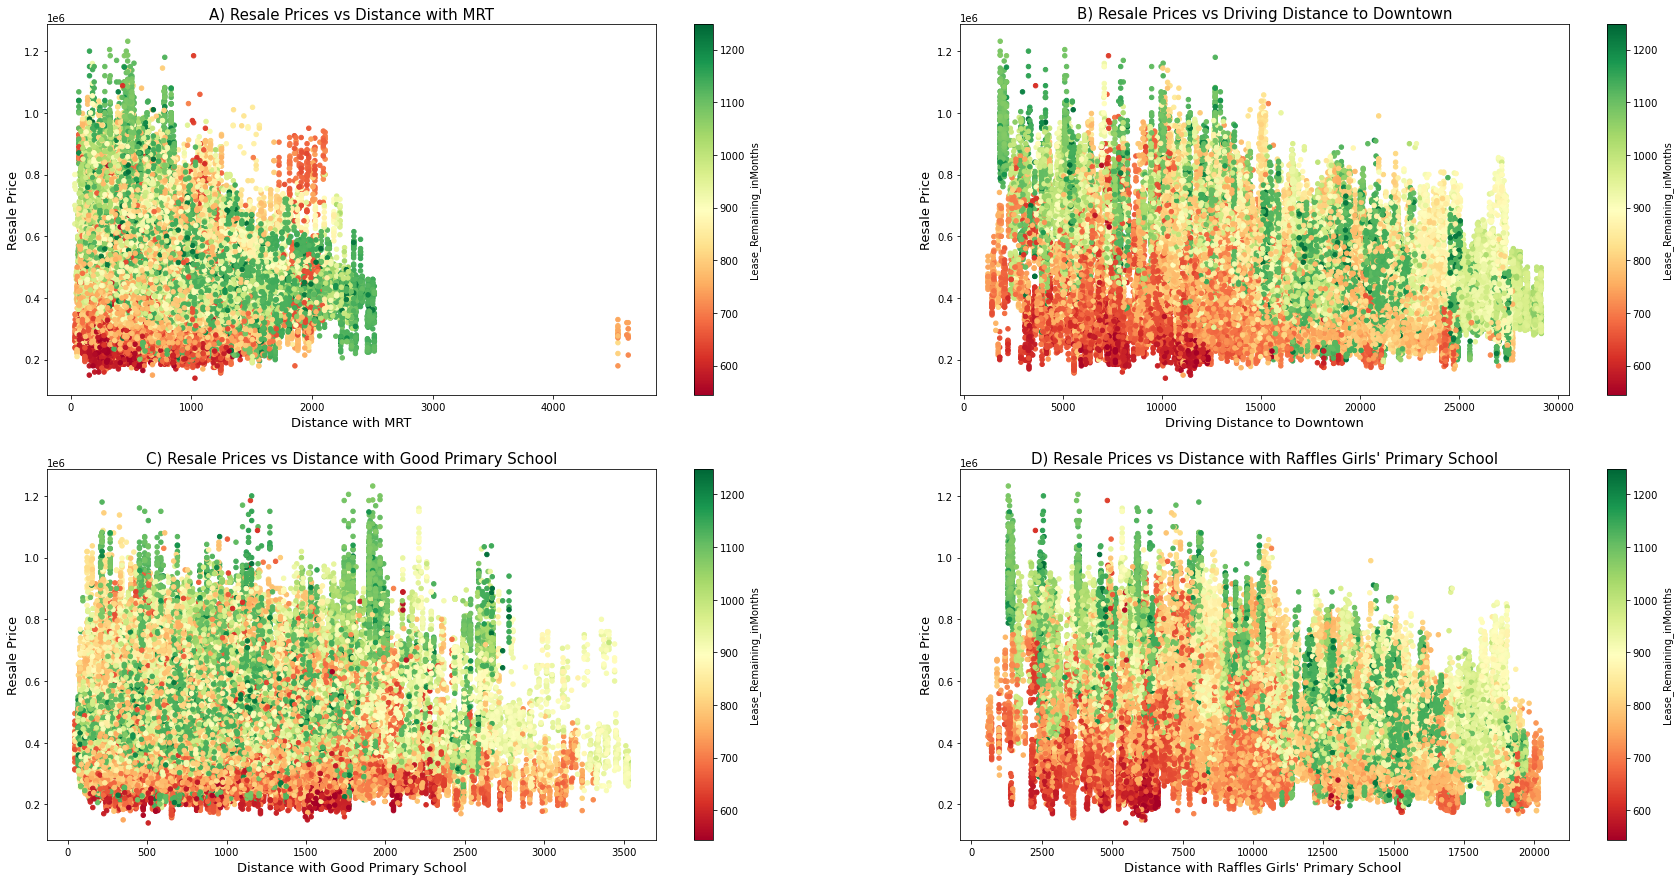

In [31]:
# Create the figure
fig_dimensions=(30, 15)
fig = plt.figure(figsize = fig_dimensions)

#Plot for ax1
ax1 = fig.add_subplot(2,2,1)
complete_records.plot(kind="scatter", 
                      x="distanceWithMrt",
                      y="resale_price",
                      ax=ax1,
                      c="Lease_Remaining_inMonths",
                      colormap="RdYlGn")

ax1.set_ylabel("Resale Price", fontsize = 13)
ax1.set_xlabel("Distance with MRT", fontsize = 13)
ax1.set_title("A) Resale Prices vs Distance with MRT", fontsize=15)

#Plot for ax2
ax2 = fig.add_subplot(2,2,2)
complete_records.plot(kind="scatter", 
                      x="Drive_Dis_Downtown", 
                      y="resale_price",
                      ax=ax2,
                      c="Lease_Remaining_inMonths",
                      colormap="RdYlGn")

ax2.set_ylabel("Resale Price", fontsize = 13)
ax2.set_xlabel("Driving Distance to Downtown", fontsize = 13)
ax2.set_title("B) Resale Prices vs Driving Distance to Downtown",  fontsize=15)

#Plot for ax3
ax3 = fig.add_subplot(2,2,3)
complete_records.plot(kind="scatter", 
                      x="distanceWithGdPri", 
                      y="resale_price",
                      ax=ax3,
                      c="Lease_Remaining_inMonths",
                      colormap="RdYlGn")

ax3.set_ylabel("Resale Price", fontsize = 13)
ax3.set_xlabel("Distance with Good Primary School", fontsize = 13)
ax3.set_title("C) Resale Prices vs Distance with Good Primary School",  fontsize=15)

#Plot for ax4
ax4 = fig.add_subplot(2,2,4)
complete_records.plot(kind="scatter", 
                      x="distanceWithRaffles", 
                      y="resale_price",
                      ax=ax4,
                      c="Lease_Remaining_inMonths",
                      colormap="RdYlGn")

ax4.set_ylabel("Resale Price", fontsize = 13)
ax4.set_xlabel("Distance with Raffles Girls' Primary School ", fontsize = 13)
ax4.set_title("D) Resale Prices vs Distance with Raffles Girls' Primary School",  fontsize=15)

plt.show()

##### c)  4-room HDBs makes up the majority of the resale transactions

Text(0, 0.5, 'No. of Units')

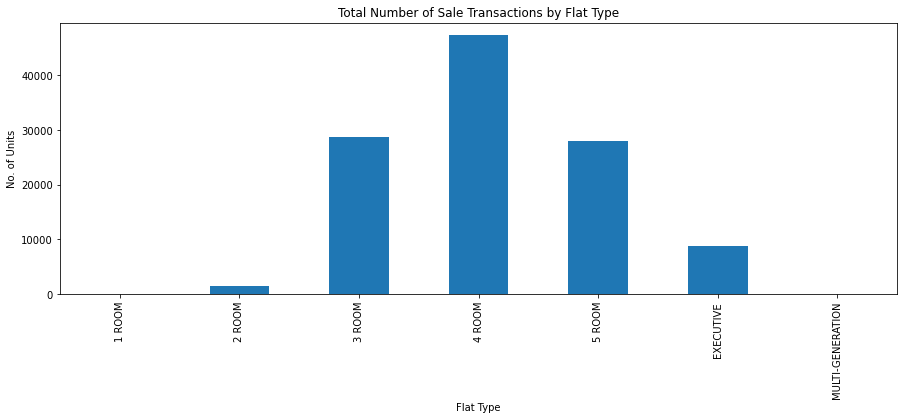

In [32]:
complete_records_gb = complete_records.groupby(['town','flat_type']).count()

fig = plt.figure(figsize = (15, 5)) 

complete_records_gb = complete_records.groupby(['flat_type']).count()
complete_records_gb['resale_price']
Total_By_Flat_Type = complete_records_gb['resale_price']
Total_By_Flat_Type.columns = [['Flat_type', 'Total no. of units']]
Total_By_Flat_Type.head()
Total_By_Flat_Type.plot (kind = 'bar')
plt.title ("Total Number of Sale Transactions by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("No. of Units")

##### d) The Top 5 Towns by Total Number of Sale Transactions from Jan 2015 to Aug 2020 were 
    1) Sengkang     : 8780 units
    2) Jurong West  : 8669 units
    3) Woodlands    : 8461 units
    4) Tampines     : 7626 units
    5) Yishun       : 7593 units

In [33]:
complete_records_gb_Top5 = complete_records.groupby(['town']).count()
complete_records_gb_Top5.nlargest(5, 'index')

,Unnamed: 0,index,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,distanceWithRaffles,distanceWithGdPri,Year_Transaction,Month_Transaction,Qtr_Transaction,Lease_Year_Remain,Lease_Month_Remain,Lease_Remaining_inMonths,Lease_Remaining_Category,Floor_Area_Category
town,,,,,,,,,,,,,,,,,,,,,
SENGKANG,8780,8780,8780,8780,8780,8780,8780,8780,8780,8780,...,8780,8780,8780,8780,8780,8780,8780,8780,8780,8780
JURONG WEST,8669,8669,8669,8669,8669,8669,8669,8669,8669,8669,...,8669,8669,8669,8669,8669,8669,8669,8669,8669,8669
WOODLANDS,8461,8461,8461,8461,8461,8461,8461,8461,8461,8461,...,8461,8461,8461,8461,8461,8461,8461,8461,8461,8461
TAMPINES,7626,7626,7626,7626,7626,7626,7626,7626,7626,7626,...,7626,7626,7626,7626,7626,7626,7626,7626,7626,7626
YISHUN,7593,7593,7593,7593,7593,7593,7593,7593,7593,7593,...,7593,7593,7593,7593,7593,7593,7593,7593,7593,7593


In [35]:
#Filter for Top 5 Towns 
cond1 = complete_records ['town'] == 'SENGKANG'
cond2 = complete_records ['town'] == 'JURONG WEST'
cond3 = complete_records ['town'] == 'WOODLANDS'
cond4 = complete_records ['town'] == 'TAMPINES'
cond5 = complete_records ['town'] == 'YISHUN'

CR_Top_5_Towns = complete_records [cond1 | cond2 |cond3 |cond4 |cond5]
CR_Top_5_Towns.shape

(41129, 79)

##### e) The Average Resale Price for All Flat Types for The Top 5 Towns did not dip in 2020 despite an economic downturn due to Covid-19 period
This could be due to couples seeking urgent need for accommodation as completion of BTOs were delayed or oversubscribed leading them to seek resale HDBs instead. In addition, the financial assistance and stimulus packages provided by the Government during this period could have also prevented from flat prices from falling.

Reference: https://www.channelnewsasia.com/news/singapore/hdb-resale-prices-q3-circuit-breaker-13348024

In [38]:
#Filter for 2 ROOM
cond1 = CR_Top_5_Towns['flat_type'] == '2 ROOM'
CR_Top_5_Towns_2ROOM = CR_Top_5_Towns [cond1]
CR_Top_5_Towns_2ROOM.shape

price_time_2R = CR_Top_5_Towns_2ROOM[["town","Year_Transaction","resale_price"]]
price_time_final_2R = price_time_2R.pivot_table(columns = "town", 
                                          index = "Year_Transaction",
                                          values = "resale_price",
                                          aggfunc = np.mean)


In [37]:
#Filter for 3 ROOM
cond1 = CR_Top_5_Towns['flat_type'] == '3 ROOM'
CR_Top_5_Towns_3ROOM = CR_Top_5_Towns [cond1]
CR_Top_5_Towns_3ROOM.shape

price_time_3R = CR_Top_5_Towns_3ROOM[["town","Year_Transaction","resale_price"]]
price_time_final_3R = price_time_3R.pivot_table(columns = "town", 
                                          index = "Year_Transaction",
                                          values = "resale_price",
                                          aggfunc = np.mean)


In [39]:
#Filter for 4 ROOM
cond1 = CR_Top_5_Towns['flat_type'] == '4 ROOM'
CR_Top_5_Towns_4ROOM = CR_Top_5_Towns [cond1]
CR_Top_5_Towns_4ROOM.shape

price_time_4R = CR_Top_5_Towns_4ROOM[["town","Year_Transaction","resale_price"]]
price_time_final_4R = price_time_4R.pivot_table(columns = "town", 
                                          index = "Year_Transaction",
                                          values = "resale_price",
                                          aggfunc = np.mean)


In [40]:
#Filter for 5 ROOM
cond1 = CR_Top_5_Towns['flat_type'] == '5 ROOM'
CR_Top_5_Towns_5ROOM = CR_Top_5_Towns [cond1]
CR_Top_5_Towns_5ROOM.shape

price_time_5R = CR_Top_5_Towns_5ROOM[["town","Year_Transaction","resale_price"]]
price_time_final_5R = price_time_5R.pivot_table(columns = "town", 
                                          index = "Year_Transaction",
                                          values = "resale_price",
                                          aggfunc = np.mean)


In [41]:
#Filter for EXECUTIVE
cond1 = CR_Top_5_Towns['flat_type'] == 'EXECUTIVE'
CR_Top_5_Towns_EXE = CR_Top_5_Towns [cond1]
CR_Top_5_Towns_EXE.shape

price_time_EXE = CR_Top_5_Towns_EXE[["town","Year_Transaction","resale_price"]]
price_time_final_EXE = price_time_EXE.pivot_table(columns = "town", 
                                          index = "Year_Transaction",
                                          values = "resale_price",
                                          aggfunc = np.mean)


In [42]:
#Filter for MULTI-GENERATION
cond1 = CR_Top_5_Towns['flat_type'] == 'MULTI-GENERATION'
CR_Top_5_Towns_MG = CR_Top_5_Towns [cond1]
CR_Top_5_Towns_MG.shape

price_time_MG = CR_Top_5_Towns_MG[["town","Year_Transaction","resale_price"]]
price_time_final_MG = price_time_MG.pivot_table(columns = "town", 
                                          index = "Year_Transaction",
                                          values = "resale_price",
                                          aggfunc = np.mean)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Average Resale Price Over The Years for Top 5 Towns')

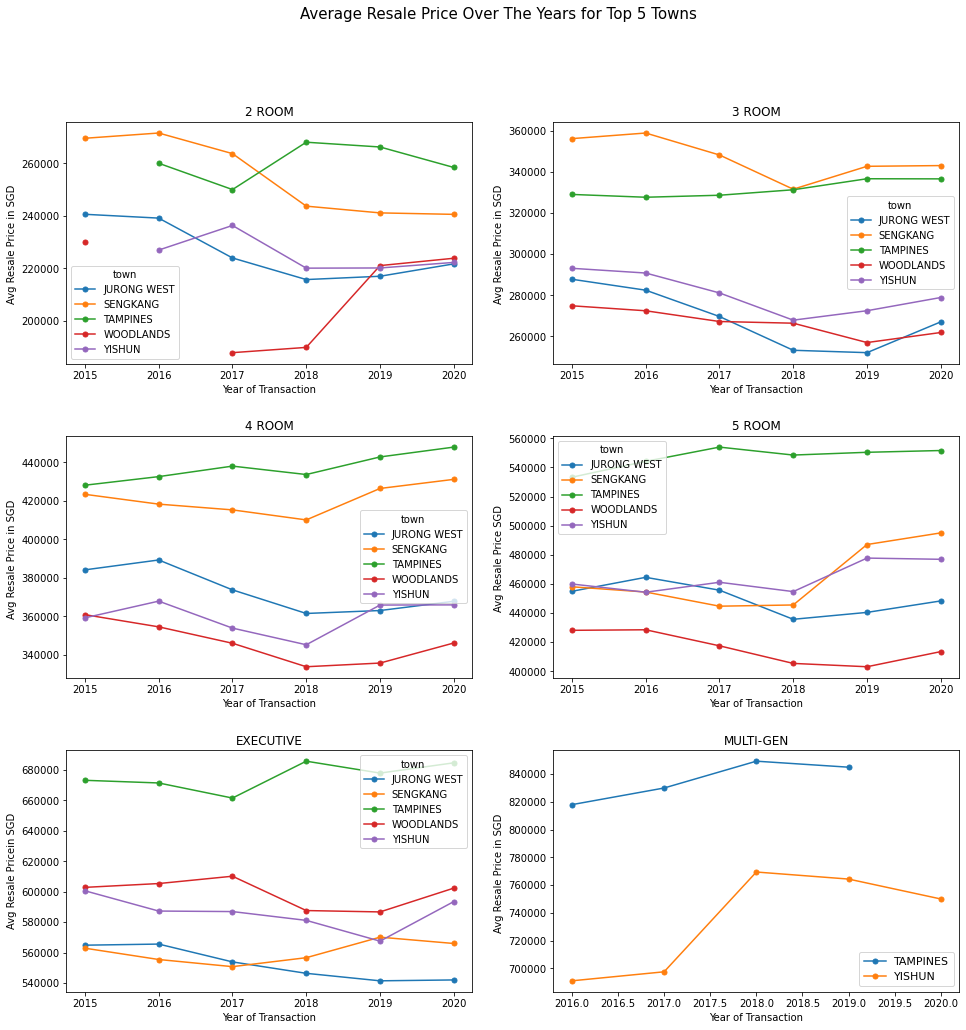

In [50]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace =0.3)
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)


graph_1 = price_time_final_2R.plot(ax=ax1, marker='o',ms=5)
plt.legend(loc ="lower right",prop={"size": 11})
graph_1.set(ylabel = "Avg Resale Price in SGD ",
            xlabel = "Year of Transaction",
           title= "2 ROOM")

graph_2 = price_time_final_3R.plot(ax=ax2, marker='o',ms=5)
plt.legend(loc ="lower right",prop={"size": 11})
graph_2.set(ylabel = "Avg Resale Price in SGD ",
            xlabel = "Year of Transaction",
           title= "3 ROOM")

graph_3 = price_time_final_4R.plot(ax=ax3, marker='o',ms=5)
plt.legend(loc ="lower right",prop={"size": 11})
graph_3.set(ylabel = "Avg Resale Price in SGD ",
            xlabel = "Year of Transaction",
           title= "4 ROOM")

graph_4 = price_time_final_5R.plot(ax=ax4, marker='o', ms=5)
plt.legend(loc ="lower right",prop={"size": 11})
graph_4.set(ylabel = "Avg Resale Price SGD ",
            xlabel = "Year of Transaction",
           title= "5 ROOM")

graph_5 = price_time_final_EXE.plot(ax=ax5, marker='o',ms=5)
plt.legend(loc ="lower right",prop={"size": 11})
graph_5.set(ylabel = "Avg Resale Pricein SGD",
            xlabel = "Year of Transaction",
           title= "EXECUTIVE")

graph_6 = price_time_final_MG.plot(ax=ax6, marker='o',ms=5)
plt.legend(loc ="lower right",prop={"size": 11})
graph_6.set(ylabel = "Avg Resale Price in SGD ",
            xlabel = "Year of Transaction",
           title= "MULTI-GEN")

plt.suptitle("Average Resale Price Over The Years for Top 5 Towns", fontsize=15)


 ##### Further Exploration: Checking for Outlier for Each Flat Type

We decided against the removal of outliers as the numbers are insignificant and we are aware that there are transactions that go beyond their norm rate.

Outlier for 1 ROOM flats

In [46]:
#Filter for 1 ROOM 
cond1 = complete_records ['flat_type'] == '1 ROOM'
CR_1ROOM = complete_records[cond1]
CR_1ROOM['resale_price']

quartile_1 = CR_1ROOM['resale_price'].quantile(q=0.25)
quartile_3 = CR_1ROOM['resale_price'].quantile(q=0.75)

print('1. The 25th percentile for 1-ROOM is S${:,.0f}'.format(quartile_1))
print('2. The 75th percentile for 1-ROOM is S${:,.0f}'.format(quartile_3))


IQR = quartile_3 - quartile_1
print('3. The IQR for 1-ROOM is S${:,.0f}'.format(IQR))


# Calculate Upper and Lower Bounds
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

print('4. The lower bound for 1-ROOM is S${:,.0f}'.format(lower_bound))
print('5. The upper bound for 1-ROOM is S${:,.0f}'.format(upper_bound))


outside_upper = CR_1ROOM['resale_price'] > upper_bound   # cond1
outside_lower = CR_1ROOM['resale_price'] < lower_bound   # cond2 

ROOM1_outliers_df = CR_1ROOM[  outside_upper | outside_lower  ]  # this should be an "|" OR
print('6. No. of outlier for 1-ROOM is {}'.format(len(ROOM1_outliers_df)))

1. The 25th percentile for 1-ROOM is S$174,134
2. The 75th percentile for 1-ROOM is S$206,500
3. The IQR for 1-ROOM is S$32,366
4. The lower bound for 1-ROOM is S$125,585
5. The upper bound for 1-ROOM is S$255,049
6. No. of outlier for 1-ROOM is 0


Outlier for 2 ROOM flats

In [47]:
#Filter for 2 ROOM 
cond1 = complete_records ['flat_type'] == '2 ROOM'
CR_2ROOM = complete_records[cond1]
CR_2ROOM['resale_price']

quartile_1 = CR_2ROOM['resale_price'].quantile(q=0.25)
quartile_3 = CR_2ROOM['resale_price'].quantile(q=0.75)

print('1. The 25th percentile for 2-ROOM is S${:,.0f}'.format(quartile_1))
print('2. The 75th percentile for 2-ROOM is S${:,.0f}'.format(quartile_3))


IQR = quartile_3 - quartile_1
print('3. The IQR for 2-ROOM is S${:,.0f}'.format(IQR))


# Calculate Upper and Lower Bounds
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

print('4. The lower bound for 2-ROOM is S${:,.0f}'.format(lower_bound))
print('5. The upper bound for 2-ROOM is S${:,.0f}'.format(upper_bound))


outside_upper = CR_2ROOM['resale_price'] > upper_bound   # cond1
outside_lower = CR_2ROOM['resale_price'] < lower_bound   # cond2 

ROOM2_outliers_df = CR_2ROOM[  outside_upper | outside_lower  ]  # this should be an "|" OR
print('6. No. of outlier for 2-ROOM is {}'.format(len(ROOM2_outliers_df)))

1. The 25th percentile for 2-ROOM is S$215,000
2. The 75th percentile for 2-ROOM is S$250,000
3. The IQR for 2-ROOM is S$35,000
4. The lower bound for 2-ROOM is S$162,500
5. The upper bound for 2-ROOM is S$302,500
6. No. of outlier for 2-ROOM is 50


Outlier for 3 ROOM flats

In [48]:
#Filter for 3 ROOM 
cond1 = complete_records ['flat_type'] == '3 ROOM'
CR_3ROOM = complete_records[cond1]
CR_3ROOM['resale_price']

quartile_1 = CR_3ROOM['resale_price'].quantile(q=0.25)
quartile_3 = CR_3ROOM['resale_price'].quantile(q=0.75)

print('1. The 25th percentile for 3-ROOM is S${:,.0f}'.format(quartile_1))
print('2. The 75th percentile for 3-ROOM is S${:,.0f}'.format(quartile_3))


IQR = quartile_3 - quartile_1
print('3. The IQR for 3-ROOM is S${:,.0f}'.format(IQR))


# Calculate Upper and Lower Bounds
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

print('4. The lower bound for 3-ROOM is S${:,.0f}'.format(lower_bound))
print('5. The upper bound for 3-ROOM is S${:,.0f}'.format(upper_bound))


outside_upper = CR_3ROOM['resale_price'] > upper_bound   # cond1
outside_lower = CR_3ROOM['resale_price'] < lower_bound   # cond2 

ROOM3_outliers_df = CR_3ROOM[  outside_upper | outside_lower  ]  # this should be an "|" OR
print('6. No. of outlier for 3-ROOM is {}'.format(len(ROOM3_outliers_df)))


1. The 25th percentile for 3-ROOM is S$270,000
2. The 75th percentile for 3-ROOM is S$338,000
3. The IQR for 3-ROOM is S$68,000
4. The lower bound for 3-ROOM is S$168,000
5. The upper bound for 3-ROOM is S$440,000
6. No. of outlier for 3-ROOM is 1344


Outlier for 4 ROOM flats

In [49]:
#Filter for 4 ROOM 
cond1 = complete_records ['flat_type'] == '4 ROOM'
CR_4ROOM = complete_records[cond1]
CR_4ROOM['resale_price']

quartile_1 = CR_4ROOM['resale_price'].quantile(q=0.25)
quartile_3 = CR_4ROOM['resale_price'].quantile(q=0.75)

print('1. The 25th percentile for 4-ROOM is S${:,.0f}'.format(quartile_1))
print('2. The 75th percentile for 4-ROOM is S${:,.0f}'.format(quartile_3))


IQR = quartile_3 - quartile_1
print('3. The IQR for 4-ROOM is S${:,.0f}'.format(IQR))


# Calculate Upper and Lower Bounds
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

print('4. The lower bound for 4-ROOM is S${:,.0f}'.format(lower_bound))
print('5. The upper bound for 4-ROOM is S${:,.0f}'.format(upper_bound))


outside_upper = CR_4ROOM['resale_price'] > upper_bound   # cond1
outside_lower = CR_4ROOM['resale_price'] < lower_bound   # cond2 

ROOM4_outliers_df = CR_4ROOM[  outside_upper | outside_lower  ]  # this should be an "|" OR
print('6. No. of outlier for 4-ROOM is {}'.format(len(ROOM4_outliers_df)))


1. The 25th percentile for 4-ROOM is S$358,000
2. The 75th percentile for 4-ROOM is S$468,000
3. The IQR for 4-ROOM is S$110,000
4. The lower bound for 4-ROOM is S$193,000
5. The upper bound for 4-ROOM is S$633,000
6. No. of outlier for 4-ROOM is 3765


Outlier for 5 ROOM flats

In [50]:
#Filter for 5 ROOM 
cond1 = complete_records ['flat_type'] == '5 ROOM'
CR_5ROOM = complete_records[cond1]
CR_5ROOM['resale_price']

quartile_1 = CR_5ROOM['resale_price'].quantile(q=0.25)
quartile_3 = CR_5ROOM['resale_price'].quantile(q=0.75)

print('1. The 25th percentile for 5-ROOM is S${:,.0f}'.format(quartile_1))
print('2. The 75th percentile for 5-ROOM is S${:,.0f}'.format(quartile_3))


IQR = quartile_3 - quartile_1
print('3. The IQR for 5-ROOM is S${:,.0f}'.format(IQR))


# Calculate Upper and Lower Bounds
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

print('4. The lower bound for 5-ROOM is S${:,.0f}'.format(lower_bound))
print('5. The upper bound for 5-ROOM is S${:,.0f}'.format(upper_bound))


outside_upper = CR_5ROOM['resale_price'] > upper_bound   # cond1
outside_lower = CR_5ROOM['resale_price'] < lower_bound   # cond2 

ROOM5_outliers_df = CR_5ROOM[  outside_upper | outside_lower  ]  # this should be an "|" OR
print('6. No. of outlier for 5-ROOM is {}'.format(len(ROOM5_outliers_df)))


1. The 25th percentile for 5-ROOM is S$425,000
2. The 75th percentile for 5-ROOM is S$580,000
3. The IQR for 5-ROOM is S$155,000
4. The lower bound for 5-ROOM is S$192,500
5. The upper bound for 5-ROOM is S$812,500
6. No. of outlier for 5-ROOM is 1861


Outlier for EXECUTIVE flats

In [51]:
#Filter for EXECUTIVE 
cond1 = complete_records ['flat_type'] == 'EXECUTIVE'
CR_EXE = complete_records[cond1]
CR_EXE['resale_price']

quartile_1 = CR_EXE['resale_price'].quantile(q=0.25)
quartile_3 = CR_EXE['resale_price'].quantile(q=0.75)

print('1. The 25th percentile for EXECUTIVE is S${:,.0f}'.format(quartile_1))
print('2. The 75th percentile for EXECUTIVE is S${:,.0f}'.format(quartile_3))


IQR = quartile_3 - quartile_1
print('3. The IQR for EXECUTIVE is S${:,.0f}'.format(IQR))


# Calculate Upper and Lower Bounds
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

print('4. The lower bound for EXECUTIVE is S${:,.0f}'.format(lower_bound))
print('5. The upper bound for EXECUTIVE is S${:,.0f}'.format(upper_bound))


outside_upper = CR_EXE['resale_price'] > upper_bound   # cond1
outside_lower = CR_EXE['resale_price'] < lower_bound   # cond2 

EXE_outliers_df = CR_EXE[  outside_upper | outside_lower  ]  # this should be an "|" OR
print('6. No. of outlier for EXECUTIVE is {}'.format(len(EXE_outliers_df)))


1. The 25th percentile for EXECUTIVE is S$543,416
2. The 75th percentile for EXECUTIVE is S$683,000
3. The IQR for EXECUTIVE is S$139,584
4. The lower bound for EXECUTIVE is S$334,040
5. The upper bound for EXECUTIVE is S$892,376
6. No. of outlier for EXECUTIVE is 260


Outlier for MULTI-GENERATION flats

In [52]:
#Filter for EXECUTIVE 
cond1 = complete_records ['flat_type'] == 'MULTI-GENERATION'
CR_MG = complete_records[cond1]
CR_MG['resale_price']

quartile_1 = CR_MG['resale_price'].quantile(q=0.25)
quartile_3 = CR_MG['resale_price'].quantile(q=0.75)

print('1. The 25th percentile for MULTI-GENERATION is S${:,.0f}'.format(quartile_1))
print('2. The 75th percentile for MULTI-GENERATION is S${:,.0f}'.format(quartile_3))


IQR = quartile_3 - quartile_1
print('3. The IQR for MULTI-GENERATION is S${:,.0f}'.format(IQR))


# Calculate Upper and Lower Bounds
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

print('4. The lower bound for MULTI-GENERATION is S${:,.0f}'.format(lower_bound))
print('5. The upper bound for MULTI-GENERATIONis S${:,.0f}'.format(upper_bound))


outside_upper = CR_MG['resale_price'] > upper_bound   # cond1
outside_lower = CR_MG['resale_price'] < lower_bound   # cond2 

MG_outliers_df = CR_MG[  outside_upper | outside_lower  ]  # this should be an "|" OR
print('6. No. of outlier for MULTI-GENERATION is {}'.format(len(MG_outliers_df)))


1. The 25th percentile for MULTI-GENERATION is S$738,750
2. The 75th percentile for MULTI-GENERATION is S$840,000
3. The IQR for MULTI-GENERATION is S$101,250
4. The lower bound for MULTI-GENERATION is S$586,875
5. The upper bound for MULTI-GENERATIONis S$991,875
6. No. of outlier for MULTI-GENERATION is 0


[Text(0, 0, '1 ROOM'),
 Text(0, 0, '2 ROOM'),
 Text(0, 0, '3 ROOM'),
 Text(0, 0, '4 ROOM'),
 Text(0, 0, '5 ROOM'),
 Text(0, 0, 'EXECUTIVE'),
 Text(0, 0, 'MULTI-GENERATION')]

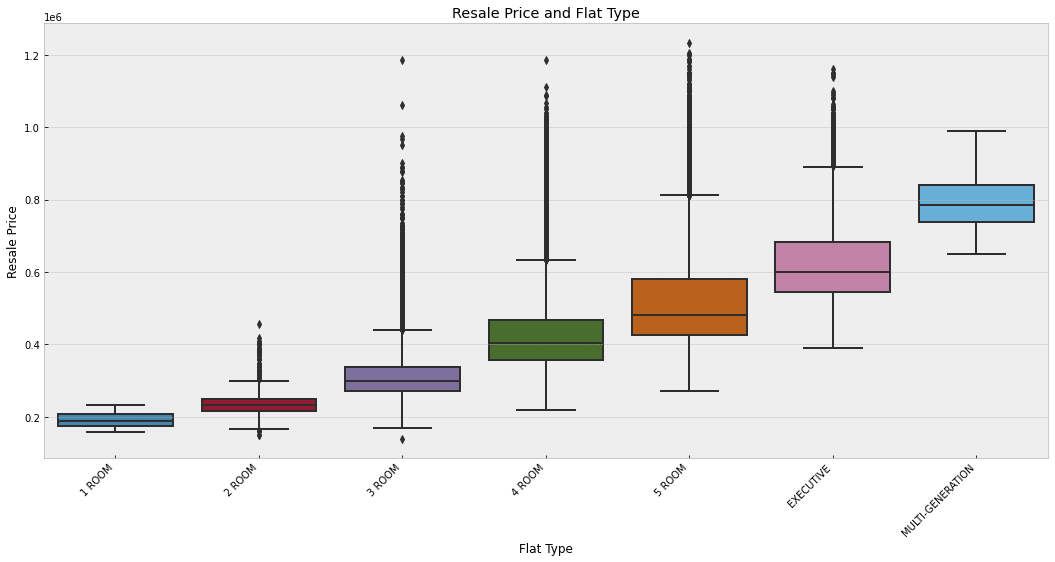

In [53]:
price_town_flat = complete_records[["town","resale_price",'flat_type']]


plt.style.use('bmh')
fig = plt.figure(figsize = (18, 8)) 
flat = price_town_flat['flat_type'].unique()

graph_1 = sns.boxplot(price_town_flat.flat_type, price_town_flat.resale_price, order = ["1 ROOM", "2 ROOM", "3 ROOM", '4 ROOM', "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"])
graph_1.set(title = "Resale Price and Flat Type",
            xlabel = "Flat Type",
            ylabel = "Resale Price")

graph_1.set_xticklabels(graph_1.get_xticklabels(),
                        rotation = 45,
                        horizontalalignment = "right")

# 3) Data Modelling

We will be starting off with the complete dataset and fitlering down columns

In [54]:
complete_records.head()

,Unnamed: 0,index,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,distanceWithRaffles,distanceWithGdPri,Year_Transaction,Month_Transaction,Qtr_Transaction,Lease_Year_Remain,Lease_Month_Remain,Lease_Remaining_inMonths,Lease_Remaining_Category,Floor_Area_Category
0,0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,...,10264.638450,398.600330,2015,1,Q1,70,0,840,61-70,51-60
1,1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,10028.228240,1998.100164,2015,1,Q1,65,0,780,61-70,61-70
2,2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,...,10084.915520,430.887585,2015,1,Q1,64,0,768,61-70,61-70
3,3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,...,9341.713414,1852.231622,2015,1,Q1,63,0,756,61-70,61-70
4,4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,...,9786.809697,1892.571045,2015,1,Q1,64,0,768,61-70,61-70


### Dealing with NA and Duplicated Categorical Columns Created

In [55]:
pd.set_option('display.max_rows', 100)
display(complete_records[complete_records.isna().any(axis=1)].shape,
        complete_records.shape)

(240, 79)

(114313, 79)

In [56]:
complete_records.dropna(inplace = True)
complete_records.drop(columns = ["index"],inplace= True)
display(complete_records.shape)
complete_records.head()

(114073, 78)

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,distanceWithRaffles,distanceWithGdPri,Year_Transaction,Month_Transaction,Qtr_Transaction,Lease_Year_Remain,Lease_Month_Remain,Lease_Remaining_inMonths,Lease_Remaining_Category,Floor_Area_Category
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,...,10264.638450,398.600330,2015,1,Q1,70,0,840,61-70,51-60
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,...,10028.228240,1998.100164,2015,1,Q1,65,0,780,61-70,61-70
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,...,10084.915520,430.887585,2015,1,Q1,64,0,768,61-70,61-70
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,...,9341.713414,1852.231622,2015,1,Q1,63,0,756,61-70,61-70
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,9786.809697,1892.571045,2015,1,Q1,64,0,768,61-70,61-70


Function to change categorical floor to int value, we believe that by doing so will be useful in our analysis

In [96]:
#Convert column: floor to avg #not cateogrical
def convert_floor(data):
    converted = []
    for row in data:
        x = row.split()
        if len(x) == 3:
            y = int(x[0]) + int(x[2])
            y/=2
            converted.append(int(y))
        else:
            converted.append(np.nan)
            
    return converted

complete_records["avg_floor"] = convert_floor(complete_records.storey_range)

To drop 'Month' column as 'year' and 'month' have been extracted out to 'Month_Transaction' and 'Year_Transaction'

In [97]:
complete_records.drop(columns=["Floor_Area_Category","Lease_Remaining_Category","Lease_Month_Remain",
                              "Lease_Year_Remain","Qtr_Transaction","month"],inplace=True)

complete_records.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,...,a49,a50,searchval,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,Year_Transaction,Month_Transaction,Lease_Remaining_inMonths,avg_floor
0,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,...,7426.678067,7603.254076,KEBUN BARU LINK 1,1102.047333,10264.638450,398.600330,2015,1,840,8
1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,...,6631.829604,9604.675816,CHENG SAN GREEN,807.806650,10028.228240,1998.100164,2015,1,780,2
2,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,...,7441.098511,7663.151111,HDB-ANG MO KIO,1184.271617,10084.915520,430.887585,2015,1,768,2
3,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,...,7201.663012,9596.227972,CHONG BOON CENTRE,689.159860,9341.713414,1852.231622,2015,1,756,2
4,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,...,6351.381929,9842.036151,CHENG SAN PLACE,929.415476,9786.809697,1892.571045,2015,1,768,8


### Correlation Heatmap for X Variables - To exclude unknown variables a1 to a50?

Since we do not know what a1 to a50 are, we run correlation test and Variance Inflation Factor(VIF) to decide if we should drop these variables

[Text(0.5, 0, 'floor_area_sqm'),
 Text(1.5, 0, 'lease_commence_date'),
 Text(2.5, 0, 'resale_price'),
 Text(3.5, 0, 'lat'),
 Text(4.5, 0, 'long'),
 Text(5.5, 0, 'Drive_Dis_Downtown'),
 Text(6.5, 0, 'distanceWithMrt'),
 Text(7.5, 0, 'distanceWithRaffles'),
 Text(8.5, 0, 'distanceWithGdPri'),
 Text(9.5, 0, 'Month_Transaction'),
 Text(10.5, 0, 'Lease_Remaining_inMonths'),
 Text(11.5, 0, 'avg_floor')]

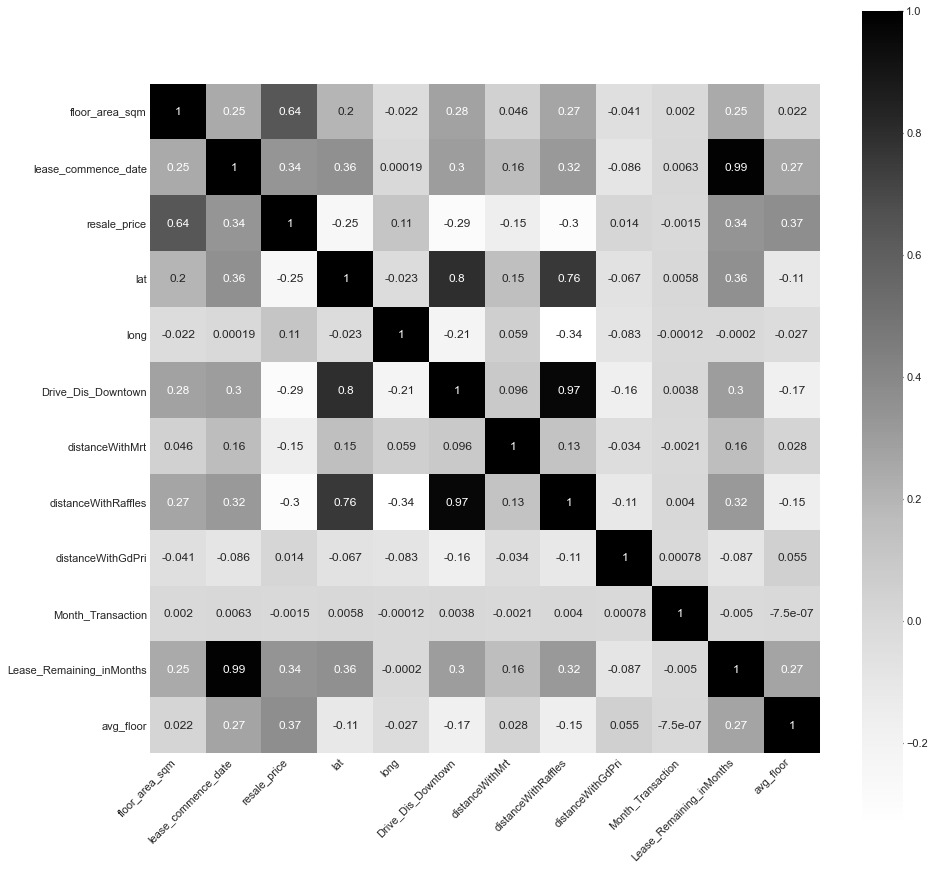

In [98]:
a_list = []
for i in range(1,51,1):
    i = "a"+str(i)
    a_list.append(i)

data_corr = complete_records.select_dtypes(include=[np.number])
data_corr = complete_records.drop(columns=a_list).corr()

fig,ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(data_corr,square =True,annot=True, cmap ="Greys")
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation =45,
                  horizontalalignment = "right")

### Variance Inflation Factor(VIF)  - To check columns for Multicollinearity problem

Adapted from https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1#:~:text=A%20correlation%20plot%20can%20be,use%20VIF%20for%20better%20understanding.

"A correlation plot can be used to identify the correlation or bivariate relationship between two independent variables whereas VIF is used to identify the correlation of one independent variable with a group of other variables. Hence, it is preferred to use VIF for better understanding."

In [99]:
def c_vif(data):
    df = pd.DataFrame()
    df["Variables"] = data.columns
    df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    df.VIF = df.VIF
    return(df)

X = complete_records.select_dtypes(include=[np.number])
X = X.drop(columns = "resale_price")

c_vif(X)

,Variables,VIF
0,floor_area_sqm,2.125971e+01
1,lease_commence_date,1.113010e+06
2,lat,5.812906e+05
3,long,1.511379e+06
4,Drive_Dis_Downtown,5.216295e+02
5,a1,1.769265e+04
6,a2,4.589585e+04
7,a3,4.707659e+05
8,a4,3.520627e+04
9,a5,9.979761e+03


### Dropping Extreme VIF and Unnecessary Columns

Besides dropping a1-a50, we will drop "Block" as that variable alone do not have a linear relationship between block number and resale price. We will also drop "Remaining_lease" as it is the same as column "Lease_Remaining_inMonths".

In [183]:
a_list = []
for i in range(1,51,1):
    i = "a"+str(i)
    a_list.append(i)
    
df_model = complete_records.drop(columns=a_list)
df_model.drop(columns = ["storey_range","lease_commence_date","lat","long","block","remaining_lease","searchval","street_name","distanceWithRaffles","Year_Transaction"],inplace = True)
df_model.head()

,town,flat_type,floor_area_sqm,flat_model,resale_price,addresses,Drive_Dis_Downtown,distanceWithMrt,distanceWithGdPri,Month_Transaction,Lease_Remaining_inMonths,avg_floor
0,ANG MO KIO,3 ROOM,60.0,Improved,255000.0,174 ANG MO KIO AVE 4,15353.0,1102.047333,398.600330,1,840,8
1,ANG MO KIO,3 ROOM,68.0,New Generation,275000.0,541 ANG MO KIO AVE 10,13172.0,807.806650,1998.100164,1,780,2
2,ANG MO KIO,3 ROOM,69.0,New Generation,285000.0,163 ANG MO KIO AVE 4,14451.0,1184.271617,430.887585,1,768,2
3,ANG MO KIO,3 ROOM,68.0,New Generation,290000.0,446 ANG MO KIO AVE 10,12030.0,689.159860,1852.231622,1,756,2
4,ANG MO KIO,3 ROOM,68.0,New Generation,290000.0,557 ANG MO KIO AVE 10,13166.0,929.415476,1892.571045,1,768,8


### Label Encoding

Transforming target variable by it's natural logarithm seems to be useful in improving the fit of the model. 
Log Y and X -> a one unit increase in X would lead to a β∗100 % increase/decrease in Y

In [184]:
cat = ["town","flat_type","flat_model","addresses","Month_Transaction"]

le = LabelEncoder()
df_model[cat] = df_model[cat].apply(lambda x:le.fit_transform(x))

X = df_model.drop(columns = "resale_price")
y = df_model[["resale_price"]].apply(np.log)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(91258, 11)

(22815, 11)

(91258, 1)

(22815, 1)

### Example to show the effect of np.log - Normal Distribution

<AxesSubplot:ylabel='Frequency'>

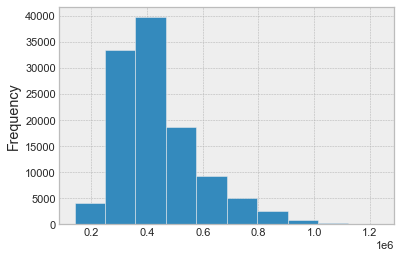

In [185]:
df_model.resale_price.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

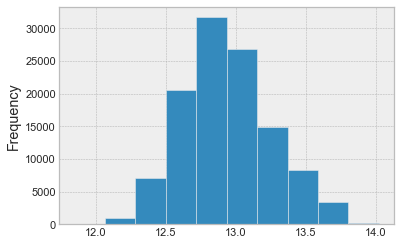

In [186]:
df_test = df_model["resale_price"]
df_test = df_test.apply(np.log)
df_test.plot(kind = "hist")

### DataFrame after Encoding Categorical Variables

In [187]:
df_model.head()

,town,flat_type,floor_area_sqm,flat_model,resale_price,addresses,Drive_Dis_Downtown,distanceWithMrt,distanceWithGdPri,Month_Transaction,Lease_Remaining_inMonths,avg_floor
0,0,2,60.0,4,255000.0,1489,15353.0,1102.047333,398.600330,0,840,8
1,0,2,68.0,11,275000.0,5978,13172.0,807.806650,1998.100164,0,780,2
2,0,2,69.0,11,285000.0,1334,14451.0,1184.271617,430.887585,0,768,2
3,0,2,68.0,11,290000.0,4957,12030.0,689.159860,1852.231622,0,756,2
4,0,2,68.0,11,290000.0,6124,13166.0,929.415476,1892.571045,0,768,8


## Linear Model

Training and Predicting

In [188]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

observation = len(df_model)
x_variables = len(df_model.columns)

r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)** 0.5

score = model.score(X_test,y_test)

print("The model r2 score is {0} and RMSE is {1}".format(score, rmse))

The model r2 score is 0.8467990972074448 and RMSE is 0.12299324235760807


### Evaluation of Model

The model R-square score of 84.7% and a MSE value of 1.5% shows that the model is a good fit.

In [189]:
explained_variance=metrics.explained_variance_score(y_test, predictions)
mean_absolute_error=metrics.mean_absolute_error(y_test, predictions)
mse=metrics.mean_squared_error(y_test, predictions)
mean_squared_log_error=metrics.mean_squared_log_error(y_test, predictions)
median_absolute_error=metrics.median_absolute_error(y_test, predictions)
r2=metrics.r2_score(y_test, predictions)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.8468
mean_squared_log_error:  0.0001
r2:  0.8468
MAE:  0.0948
MSE:  0.0151
RMSE:  0.123


### Plotting the Linear Model

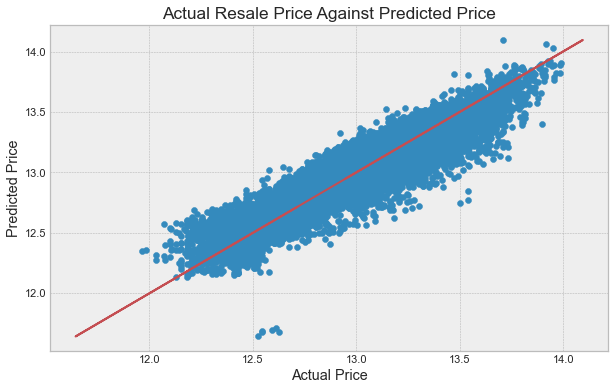

In [190]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, predictions)

plt.title("Actual Resale Price Against Predicted Price")
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")

#plot polyfit line
pred_p = predictions.flatten()
actual_p = y_test
trend = np.polyfit(pred_p, actual_p, 1).flatten()
trendpoly = np.poly1d(trend) 
plt.plot(pred_p, trendpoly(pred_p), "r-")


### Model Coefficents and Intercept

In [191]:
print(model.coef_) #slope
print(model.intercept_) #intercept

[[ 1.66623464e-03  1.82164396e-02  9.36629300e-03  2.43748515e-03
  -1.30893433e-06 -2.73247487e-05 -1.27103548e-04 -2.42563997e-05
  -1.55239300e-04  6.80628525e-04  9.02959350e-03]]
[11.83460302]


### Generating Random Values to test the Model

In [192]:
import random

new = []
for i in X_test.columns:
    if df_model[i].dtypes == "int32":
        new.append(random.randint(df_model[i].min(),df_model[i].max()))
    elif df_model[i].dtypes == "int64":
        new.append(random.randint(df_model[i].min(),df_model[i].max()))
    else:
        new.append(random.uniform(df_model[i].min(),df_model[i].max()))
        
a_series = pd. Series(new, index = X_test. columns)
testing_df = pd.DataFrame(columns = X_test.columns)
testing_df = testing_df.append(a_series, ignore_index=True)
testing_df

,town,flat_type,floor_area_sqm,flat_model,addresses,Drive_Dis_Downtown,distanceWithMrt,distanceWithGdPri,Month_Transaction,Lease_Remaining_inMonths,avg_floor
0,4.0,6.0,48.391965,8.0,4230.0,5327.90163,2289.089527,3527.048791,5.0,619.0,17.0


In [193]:
predicted_example = model.predict(testing_df)
print("Predicted Price is: $", np.exp(predicted_example[0][0]))

Predicted Price is: $ 260336.5467550325


### This model can be further implemented into a Search Engine which helps home buyers/sellers get a better estimate of their HDB flats.

## Further Improvements

We recognise that there are other factors that could affect the pricing of the HDB Resale flats such as the economy. It would also be useful to have data on the following for better predictions:
- House Conditions (Renovated, if yes, when was last renovation)
- Date of Home Improvement Programme (if any)
- Distance to Amenities such as Supermarket, Bus stops, Expressways